# Movenet

Using movenet to detect human poses.

### Constants

In [74]:
labels = {'standing': 0, 'takedown': 1, 'open_guard': 2, 'half_guard': 3, 'closed_guard': 4, '5050_guard': 5, 'side_control': 6, 'mount': 7, 'back': 8, 'turtle': 9}
body_parts = ["nose", "left eye", "right eye", "left ear", "right ear", "left shoulder", "right shoulder", "left elbow", "right elbow", "left wrist", "right wrist", "left hip", "right hip", "left knee", "right knee", "left ankle", "right ankle"]
num_labels = len(labels)
num_keypoints = 17
num_players = 2

connections = [
        ('nose', 'left eye'), ('left eye', 'left ear'), ('nose', 'right eye'), ('right eye', 'right ear'),
        ('nose', 'left shoulder'), ('left shoulder', 'left elbow'), ('left elbow', 'left wrist'),
        ('nose', 'right shoulder'), ('right shoulder', 'right elbow'), ('right elbow', 'right wrist'),
        ('left shoulder', 'left hip'), ('right shoulder', 'right hip'), ('left hip', 'right hip'),
        ('left hip', 'left knee'), ('right hip', 'right knee'), ('left knee', 'left ankle'), ('right knee', 'right ankle')
    ]

### Importing Movenet model

In [75]:
import tensorflow_hub as hub

model = hub.load("../assets/movenet")
movenet = model.signatures['serving_default']

### Utils functions

#### Libraries

In [76]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#### Get keypoints from image using movenet

In [77]:
def get_keypoints(image_path):
    image = tf.io.read_file(image_path)
    image = tf.compat.v1.image.decode_jpeg(image)

    X = tf.expand_dims(image, axis=0)
    X = tf.cast(tf.image.resize_with_pad(X, 640, 640), dtype=tf.int32)
    
    outputs = movenet(X)
    keypoints = outputs['output_0'].numpy()[0][:, :-5].astype(float)
    
    return keypoints

#### Draw keypoints on image

In [98]:
def draw_image_with_keypoints(image_path, keypoints, width=640, height=640):
    image = cv.imread(image_path)
    
    colors = [(0, 0, 255), (255, 0, 0), (0, 255, 0), (255, 255, 0), (0, 255, 255), (255, 0, 255), (255, 255, 255), (0, 0, 0)]
    c = 0

    for keypoint_set in keypoints:
        print(keypoint_set)
        for i in range(num_keypoints):
            x = int(keypoint_set[i][1] * width)
            y = int(keypoint_set[i][0] * height)
            cv.circle(image, (x, y), 3, colors[c], -1)  
            
        for connection in connections:
            part_a = body_parts.index(connection[1])
            part_b = body_parts.index(connection[0])

            x1 = int(keypoint_set[part_a][1] * width)
            y1 = int(keypoint_set[part_a][0] * height)
            x2 = int(keypoint_set[part_b][1] * width)
            y2 = int(keypoint_set[part_b][0] * height)
            cv.line(image, (x1, y1), (x2, y2), colors[c], 2)
                
        c += 1
        
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.show()

### Usage

In [99]:
def movenet_keypoints(image_path, show_image=False):
    # SHAPE: (6, 56)
    keypoints = get_keypoints(image_path)
    
    keypoints = keypoints.reshape((6, num_keypoints, 3))
    
    image = cv.imread(image_path)
    h, w, _ = image.shape
    
    if show_image:
        draw_image_with_keypoints(image_path, keypoints, w, h)

[[0.53566736 0.72058797 0.06915665]
 [0.51749319 0.69638795 0.13226056]
 [0.52333981 0.71252662 0.0834356 ]
 [0.49590895 0.63666582 0.00336895]
 [0.54880691 0.70660728 0.04328642]
 [0.54696411 0.66056007 0.00467522]
 [0.60484499 0.74877787 0.20101289]
 [0.54959726 0.68362856 0.05059269]
 [0.60505307 0.76855958 0.14316545]
 [0.53568214 0.72489077 0.15125938]
 [0.59049153 0.74564481 0.1042961 ]
 [0.58677584 0.79303795 0.04309497]
 [0.59493905 0.82494873 0.17795834]
 [0.57357943 0.78728211 0.13843346]
 [0.57656807 0.89134419 0.44229046]
 [0.55600691 0.89038914 0.1016646 ]
 [0.57412928 0.95323533 0.371153  ]]
[[0.48544702 0.16816382 0.38780397]
 [0.4772118  0.16205172 0.32407233]
 [0.49688599 0.15211308 0.55740339]
 [0.47287264 0.16752502 0.38994569]
 [0.52417332 0.16426167 0.28166389]
 [0.47207004 0.2283511  0.31158349]
 [0.58555663 0.19224247 0.3142198 ]
 [0.50555116 0.32000917 0.04923755]
 [0.62404573 0.2130643  0.10547406]
 [0.46037242 0.25514808 0.02367725]
 [0.57117099 0.20571725 0.0

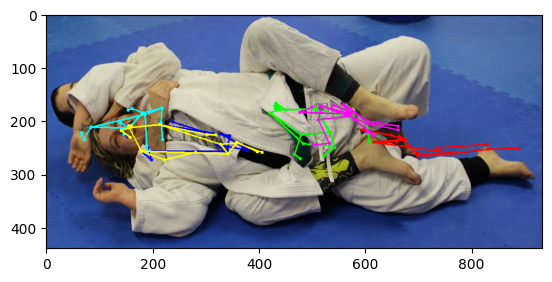

In [101]:
movenet_keypoints("../assets/images/back02.jpg", show_image=True)